# Project Description 

A new function is being developed by the virtual telephony service ‘CallMeMaybe’ that gives information to the supervisors about ineffective operators. An operators is considered to be ineffective if they have many missed call or long waiting times in additions to less outgoing calls


**Task : Find the ineffective operators based on incoming / outgoing calls and waiting times**

### Data Description 


<br>

**telecom_dataset_us.csv:**
- `user_id` — client account ID
- `date` — date the statistics were retrieved
- `direction` — call direction (`out` for outgoing, `in` for incoming)
- `internal` — whether the call was internal (between a client's operators)
- `operator_id` — operator identifier
- `is_missed_call` — whether the call was missed
- `calls_count` — number of calls
- `call_duration` — call duration (excluding waiting time)
- `total_call_duration` — call duration (including waiting time)

<br>

**telecom_clients_us.csv:**
- `user_id`
- `tariff_plan` — client's current plan
- `date_start` — client's registration date

### **CONTENTS:**

<br>

**STEP 1: DATA PREPROCESSING**
1. Check for column name correctness
2. Change the datatype wherever necessary 
3. Check for duplicates 
4. Check for missing values and fill in missing values if necessary
5. Check for incorrectness of the data values
6. Categorize the data if necessary
7. Add additional columns if necessary
8. Extract month, week and day from the date column 

<br>

**STEP 2: EXPLORATORY DATA ANALYSIS**
1. Find the number of clients and operators in the dataset
2. Plot the number of clients registered on each day
3. Plot the frequency of the operator usage on each day
4. Plot the share of outgoing calls vs incoming calls 
5. Plot the share of internal vs external calls
6. Plot the share of missed calls vs attended calls
7. Find the top 10 clients based on their calls 
8. Find the top 10 operators being used by clients
9. Find the average number of calls made for each plan 
10.Find the operators with max and min average waiting time
11. Find PLan that has more call counts and duration

<br>

**STEP 3: ANALYSE THE DATA**

- For each client:
    1. Find the list of operators they use and its count


- For each operator:
    1. Find The number of incoming, outgoing ,missed calls and waiting time in a month 
    2. Find the monthly call duration 
    3. Find the number of interanl and external calls made in a month
    4. Find the plan for which the operator is used the most 
    
<br>

**STEP 4 : IDENTIFYING INEFFECTIVE OPERATORS:**

- A threshold is set for each metric to identify effective and ineffective operator 
- An operator is considered to be ineffective if it meets all or atleast 2 of the following conditions:
    1. the number of missed calls / incoming calls is above 65% of the total missed/incoming calls
    2. the number of outgoing calls is below 35% of the total outgoing call 
    3. the wait duration is above 65% of the total wait durations 


<br>

**STEP 5 : HYPOTHESIS TESTING**
- Daily call duration for effective operator is more than that of ineffective operator's Daily call duration 


<br>

**STEP 6 : OVERALL CONCLUSION**


PS: Please provide some suggestions if something is to be included or something you feel is important for me to analyse

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import datetime as dt
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
pd.options.display.max_colwidth = 100

#plt.style.use('dark_background')

In [2]:
#reading data

operator = pd.read_csv('telecom_dataset_us.csv', na_values = ' ')
operator.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [3]:
clients = pd.read_csv('telecom_clients_us.csv', na_values = ' ')
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [4]:
[operator.shape, clients.shape]

[(53902, 9), (732, 3)]

In [5]:
# General information 

operator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [6]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [7]:
# Descriptive statistics

operator.describe(include = 'all')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
count,53902.000000,53902,53902,53785,45730.000000,53902,53902.000000,53902.000000,53902.000000
unique,NaN,119,2,2,NaN,2,NaN,NaN,NaN
top,NaN,2019-11-25 00:00:00+03:00,out,False,NaN,False,NaN,NaN,NaN
freq,NaN,1220,31917,47621,NaN,30334,NaN,NaN,NaN
mean,167295.344477,NaN,NaN,NaN,916535.993002,NaN,16.451245,866.684427,1157.133297
std,598.883775,NaN,NaN,NaN,21254.123136,NaN,62.917170,3731.791202,4403.468763
min,166377.000000,NaN,NaN,NaN,879896.000000,NaN,1.000000,0.000000,0.000000
25%,166782.000000,NaN,NaN,NaN,900788.000000,NaN,1.000000,0.000000,47.000000
50%,167162.000000,NaN,NaN,NaN,913938.000000,NaN,4.000000,38.000000,210.000000
75%,167819.000000,NaN,NaN,NaN,937708.000000,NaN,12.000000,572.000000,902.000000


In [8]:
clients.describe(include = 'all')

,user_id,tariff_plan,date_start
count,732.000000,732,732
unique,NaN,3,73
top,NaN,C,2019-09-24
freq,NaN,395,24
mean,167431.927596,NaN,NaN
std,633.810383,NaN,NaN
min,166373.000000,NaN,NaN
25%,166900.750000,NaN,NaN
50%,167432.000000,NaN,NaN
75%,167973.000000,NaN,NaN


### Data Preprocessing 

**Missing Values**

In [9]:
#Check for missing values 

operator.isnull().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [10]:
clients.isnull().sum()

user_id        0
tariff_plan    0
date_start     0
dtype: int64

> - operator data consists of some missing values in operator_id and internal columns whereas the clients data has no missing values 
> - The missing value in operator_id column in missing completely at random. So, the values can be replaced with 0
> - The missing values in interanl column in missing completely at random. So this can be filled by taking the mode or the rows can also be dropped since the proportion of missing values to the total rows is very less

In [11]:
# filling missing values in operator_id 

operator.operator_id.fillna(0, inplace = True)
#operator.operator_id.fillna(random.choice(operator[(operator.user_id == 166377) & (~operator.operator_id.isnull())].operator_id.unique()),inplace = True)

In [12]:
# fill missing values in internal 

operator.internal.fillna(operator.internal.mode()[0],inplace=True)

**Convert Datatypes**

In [13]:
# change data types in operator

#Date -> object to datetime 
operator['date'] = pd.to_datetime(operator.date.str.split(' ',n=1, expand = True)[0])

In [14]:
#operator_id -> float to int
operator.operator_id = operator.operator_id.apply( lambda x: int(x))

In [15]:
# Change datatypes in clients

#date_start -> object to datetime 
clients.date_start = pd.to_datetime(clients.date_start)

> - The date columns in both the datasets are changed from object type to datetime type using to_datetime function 
> - The operator id from operator dataset is changed from int to float using astype 

In [16]:
operator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53902 non-null  int64         
 1   date                 53902 non-null  datetime64[ns]
 2   direction            53902 non-null  object        
 3   internal             53902 non-null  bool          
 4   operator_id          53902 non-null  int64         
 5   is_missed_call       53902 non-null  bool          
 6   calls_count          53902 non-null  int64         
 7   call_duration        53902 non-null  int64         
 8   total_call_duration  53902 non-null  int64         
dtypes: bool(2), datetime64[ns](1), int64(5), object(1)
memory usage: 3.0+ MB


In [17]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


**Feature Engineering**

In [18]:
#Adding waiting time col

operator['wait_time'] = operator.total_call_duration - operator.call_duration
operator.head(3)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time
0,166377,2019-08-04,in,False,0,True,2,0,4,4
1,166377,2019-08-05,out,True,880022,True,3,0,5,5
2,166377,2019-08-05,out,True,880020,True,1,0,1,1


> - call duration is without waiting time and total_call_duration is with waiting time. So waiting time is found by subtracting the two columns 

In [19]:
#extract month, week and day of week in operator

operator['month'] = operator.date.map(lambda x: x.strftime('%Y-%m'))

operator['week'] = operator.date.dt.week

operator['day'] = operator.date.dt.dayofweek

<ipython-input-19-152db13b7fef>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  operator['week'] = operator.date.dt.week


In [20]:
# extract month from clients

clients['month'] = clients.date_start.map(lambda x: x.strftime('%Y-%m'))

> - Month , week and day is extrated from the date column in operators fro further analysis
> - Similar operation is performed on client's date column 

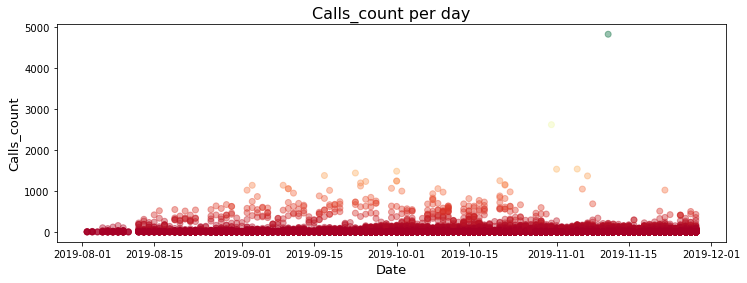

In [109]:
plt.figure(figsize=(12,4))
plt.scatter(x=operator.date, y = operator.calls_count, marker = 'o', alpha = 0.4, c=operator.calls_count ,cmap="RdYlGn")
plt.title('Calls_count per day', fontsize=16)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Calls_count', fontsize=13)
plt.show()

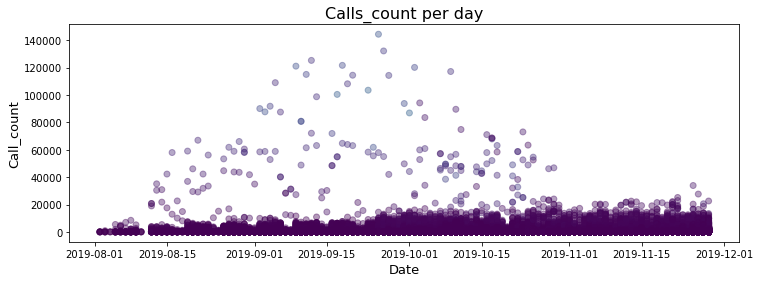

In [110]:
plt.figure(figsize=(12,4))
plt.scatter(x=operator.date, y = operator.call_duration, marker = 'o', alpha = 0.4, c=operator.calls_count ,cmap="viridis")
plt.title('Calls_count per day', fontsize=16)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Call_count', fontsize=13)
plt.show()

### Exploartory Data Analysis

**1. Find the number of clients and operators in the dataset**

In [21]:
# Number of clients 

print('The total number of clients: {}'.format(clients.user_id.nunique()))

#Number of operators
print('')
print('The total number of operators: {}'.format(operator.operator_id.nunique()))

The total number of clients: 732

The total number of operators: 1093


> - There are a total of 732 unique clients and 1092 unique operators in the dataset

**2. Plot the number of clients registered on each day**

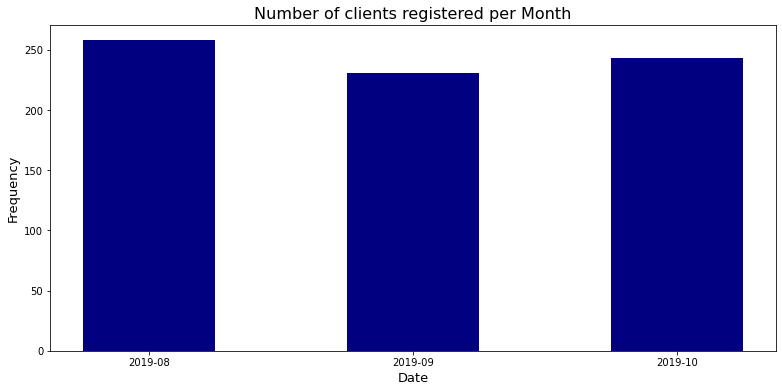

In [22]:
#Plot of number of clients registered per day

client_registrations =  clients.groupby('month').user_id.nunique().to_frame()


plt.figure(figsize =(13,6))
plt.bar(client_registrations.index ,client_registrations.user_id, color = 'navy', width = 0.5 )
plt.xlabel('Date',fontsize = 13)
plt.ylabel('Frequency', fontsize = 13)
plt.title('Number of clients registered per Month', fontsize= 16)
plt.show()

> - The number of clients registered in the month of August seems to be more than the number of registration on any other month

**3. Plot the frequency of the operator usage on each day**

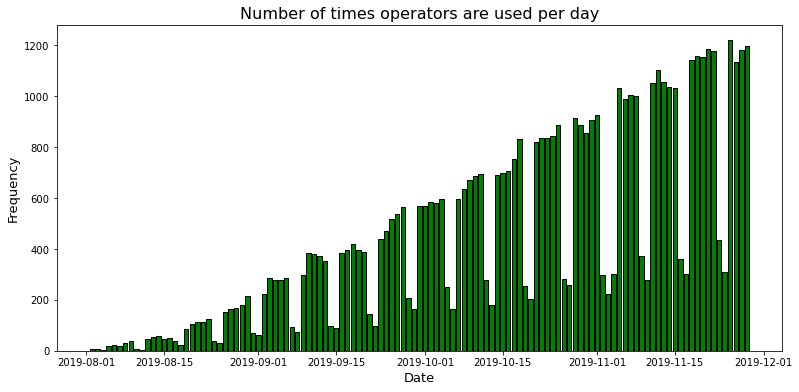

In [23]:
operator_usage = operator.groupby('date').operator_id.count().to_frame()

plt.figure(figsize=(13,6))
plt.bar(operator_usage.index, operator_usage.operator_id, color = 'green', edgecolor = 'black')
plt.xlabel('Date',fontsize = 13)
plt.ylabel('Frequency', fontsize = 13)
plt.title('Number of times operators are used per day', fontsize= 16)
plt.show()

> - The operators were least used in the month of august and then the usage gradually increased
> - The operators are increasingly being used during the weekdays and is least used during the weekend. This explains the sudden drop in the plot

**4. Plot the share of outgoing calls vs incoming calls**

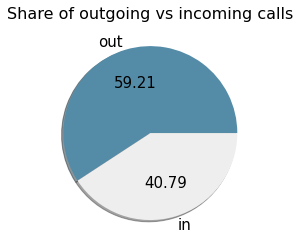

In [24]:
#share of outgoing vs incoming calls

plt.pie(operator.direction.value_counts(),
        labels =operator.direction.value_counts().index , 
        shadow = True, 
        textprops = {'fontsize':15},
        autopct='%1.2f',
       colors = ['#548CA8','#EEEEEE'])
plt.title('Share of outgoing vs incoming calls', fontsize=16)
plt.show()

> - The number of incoming calls is less for all clients compared to the number of outgoing calls

**5. Plot the share of internal vs external calls**

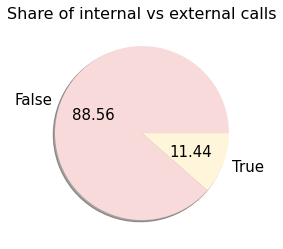

In [25]:
#share of internal vs external calls

plt.pie(operator.internal.value_counts(),
        labels =operator.internal.value_counts().index , 
        shadow = True, 
        textprops = {'fontsize':15},
        autopct='%1.2f',
       colors = ['#F7DAD9','#FFF5DA'])
plt.title('Share of internal vs external calls', fontsize=16)
plt.show()

> - Only nearly 11% of the total calls made by the operators are internal calls and the rest 89% are external calls

**6. Plot the share of missed calls vs attended calls**

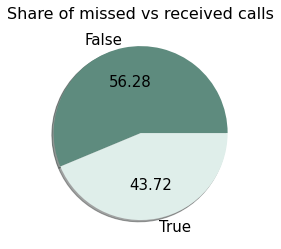

In [26]:
plt.pie(operator.is_missed_call.value_counts(),
        labels =operator.is_missed_call.value_counts().index , 
        shadow = True, 
        textprops = {'fontsize':15},
        autopct='%1.2f',
       colors = ['#5E8B7E','#DFEEEA'])
plt.title('Share of missed vs received calls', fontsize=16)
plt.show()

> - 56% of the total calls are missed calls. This could be because of the ineffective operator 

**7. Find the top 10 clients based on their calls**

In [27]:
#including missed calls

top_clients = operator.groupby('user_id').calls_count.sum().sort_values(ascending = False).to_frame()#[:10]#.reset_index()
top_clients[:10]

,calls_count
user_id,
166582,159526
167626,103183
168361,90391
167827,42615
168252,28698
168062,27701
168187,23624
166405,19182
167285,16824


In [28]:
#excluding missed calls

missed_count = operator[operator.is_missed_call==True].groupby('user_id').is_missed_call.count().to_frame()

user_calls = top_clients.merge(missed_count, on = 'user_id', how = 'left', ).fillna(0)

In [29]:
user_calls['total_calls'] = user_calls.calls_count - user_calls.is_missed_call
user_calls.sort_values('total_calls', ascending = False).total_calls[:10].to_frame()

,total_calls
user_id,
166582,159130.0
167626,102508.0
168361,89731.0
167827,42447.0
168252,28371.0
168062,27185.0
168187,22789.0
166405,18725.0
167285,16771.0


> - The client with the most calls is 166582. These clients are considered to be valuable if they dont come under the ineffective operators list
> - Since the call count also includes missed calls, its cannot be concluded that these are the most valuable clients

**8. Find how many operators are being used by a single client**

In [30]:
op_count = operator.groupby('operator_id').user_id.nunique().sort_values(ascending=False).to_frame()
op_count[op_count.user_id > 1]

,user_id
operator_id,
0,305


> - There are no operators that are used by moore than 1 client

**9. Find the average number of calls made for each plan**

In [31]:
op_cli = operator.merge(clients, on ='user_id', how = 'inner')
avg_call = op_cli.groupby('tariff_plan').calls_count.mean().sort_values(ascending = False).to_frame()

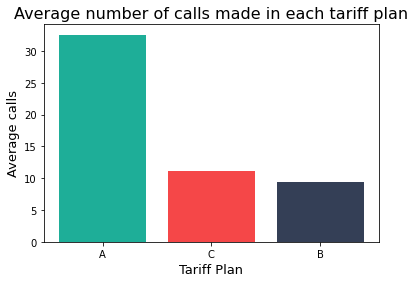

In [32]:
plt.bar(avg_call.index, avg_call.calls_count, color = ['#1EAE98','#F54748','#343F56'],)
plt.title('Average number of calls made in each tariff plan', fontsize = 16)
plt.xlabel('Tariff Plan', fontsize=13)
plt.ylabel('Average calls', fontsize=13)
plt.show()

> - This shows that Plan A is the most preferred plan by the majority of the clients

**10. Find the operators with max and min average waiting time**

In [33]:
avg_wait =((operator.groupby(['operator_id']).wait_time.sum() /  operator.groupby(['operator_id']).total_call_duration.sum()) *100).sort_values(ascending = False).to_frame()
avg_wait.columns = ['avg_wait_time']

# decalring min and max wait variable
min_wait = avg_wait.avg_wait_time.min()
max_wait = avg_wait.avg_wait_time.max()


#finding the operator with min wait time
avg_wait[avg_wait.avg_wait_time == min_wait].index.to_list()

[952734]

> - This operator is the only one to respond to calls soon

In [34]:
#finding the operators with max wait time
avg_wait[avg_wait.avg_wait_time == max_wait].index.values#.to_list()

array([937716, 885682, 937872, 937778, 937772, 937770, 891976, 937710,
       936296, 905308, 909308, 932246, 928284, 928282, 924572, 919418,
       914272, 905480, 962904, 969262, 941826, 970258, 945074, 970250,
       899076, 945898, 954284, 883018, 969284])

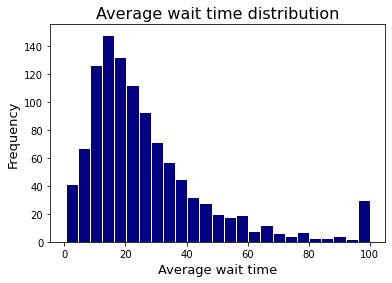

In [35]:
#plot for average wait time 

plt.hist(avg_wait.avg_wait_time, bins = 'fd', color = 'navy', edgecolor = 'white')
plt.title('Average wait time distribution', fontsize= 16)
plt.xlabel('Average wait time', fontsize =13)
plt.ylabel('Frequency', fontsize = 13)
plt.show()

> - These were all the operators who were making the clients wait the most.
> - There are about 35 operator whose wait time equal 100

**11. Find PLan that has more call counts and duration**

In [36]:
df = operator.merge(clients, on='user_id',how='inner')

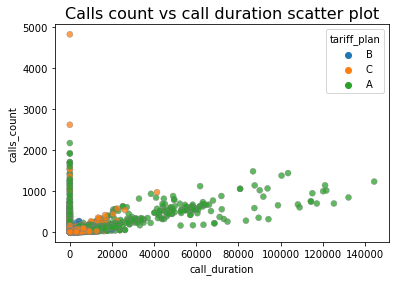

In [37]:
sns.scatterplot(data=df, x="call_duration", y="calls_count", hue="tariff_plan", alpha = 0.75, edgecolor = 'grey')
plt.title('Calls count vs call duration scatter plot', fontsize=16)
plt.show()

> - The scatter plot reveals that there are more missed call count for tarrif plan A at call duration 0 sec

### ANALYSE THE DATA

**1. Find the list of operators each clients use and which clients use more operators**

In [38]:
co = operator[operator.operator_id != 0].groupby('user_id').agg({'operator_id':['unique','nunique']}).reset_index()
co.columns = ['user_id','operators_list','number']
co.sort_values(by = 'number', ascending=False)[:10]

,user_id,operators_list,number
252,168187,"[937958, 937984, 937960, 937962, 937956, 937902, 937762, 937888, 937708, 937966, 937854, 937760,...",50
170,167626,"[919164, 919194, 919166, 919188, 919196, 919482, 919190, 919314, 919318, 919490, 919192, 919202,...",48
156,167497,"[914426, 914848, 915958, 914870, 917252, 920928, 924948, 917378, 918958, 922114, 917446, 918956,...",30
259,168252,"[939716, 939718, 940616, 940624, 940788, 940782, 940634, 940610, 940630, 940568, 940772, 940842,...",28
270,168361,"[945322, 945282, 945290, 945302, 945298, 945074, 945312, 945284, 945278, 945280, 945286, 945316,...",27
236,168062,"[947610, 947604, 947616, 951506, 951492, 947652, 947598, 947612, 947658, 951508, 947592, 947646,...",27
35,166680,"[891744, 891746, 908984, 915614, 916596, 917234, 919418, 932050, 932088, 932502, 932500, 932498,...",21
16,166520,"[885682, 884946, 890234, 890232, 892028, 893674, 891192, 897894, 909452, 910902, 910926, 923250,...",18
28,166658,"[890404, 890406, 890416, 890402, 890412, 890410, 891166, 891152, 891154, 891158, 890420, 890422,...",17
66,166916,"[906396, 906398, 906392, 906394, 906402, 906404, 906400, 906408, 906410, 906406, 906412, 928282,...",16


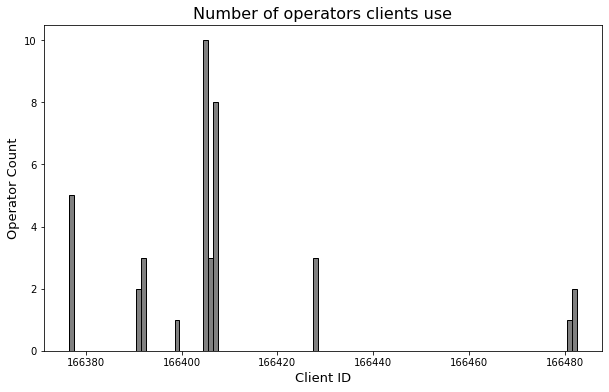

In [39]:
plt.figure(figsize=(10,6))
plt.bar(co.user_id[:10], co.number[:10], width=1, color = 'grey',edgecolor = 'black')
plt.title('Number of operators clients use', fontsize=16)
plt.xlabel('Client ID', fontsize = 13)
plt.ylabel('Operator Count', fontsize = 13)
plt.show()


> - 168187 and 167626 are the clients that uses more number of operators 

**2. Find The number of incoming, outgoing ,missed calls and waiting time in a month for each operator**

In [40]:
operator.drop(operator[operator.operator_id == 0].index, axis = 0, inplace = True)

In [41]:
in_out = pd.crosstab(index = [operator.month,operator.operator_id], columns = [operator.direction])#.reset_index()
in_out.head()

direction            in  out
month   operator_id         
2019-08 879896       15   54
        879898       11   43
        880020        1    8
        880022        0    8
        880026        4   37

In [42]:
missed = pd.crosstab(index =[operator.month,operator.operator_id], columns = operator.is_missed_call)#.reset_index()
missed.head()

is_missed_call       False  True 
month   operator_id              
2019-08 879896          44     25
        879898          33     21
        880020           5      4
        880022           3      5
        880026          23     18

In [43]:
wait = operator.groupby(['month','operator_id']).wait_time.sum().to_frame()
wait.head()

wait_time
month   operator_id           
2019-08 879896           11946
        879898           18861
        880020             248
        880022             110
        880026            4177

**3. Find the monthly call duration for each operator**

In [44]:
#monthly call duration with wait time

call_dur_1 = operator.groupby(['month','operator_id']).total_call_duration.sum().to_frame()
call_dur_1.head()

total_call_duration
month   operator_id                     
2019-08 879896                     77750
        879898                    108975
        880020                      1326
        880022                      1986
        880026                     43776

In [45]:
call_dur_2 = operator.groupby(['month','operator_id']).call_duration.sum().to_frame()
call_dur_2.head()

call_duration
month   operator_id               
2019-08 879896               65804
        879898               90114
        880020                1078
        880022                1876
        880026               39599

**4. Find the number of interanl and external calls made in a month**

In [46]:
in_ext = pd.crosstab(index =[operator.month,operator.operator_id], columns = operator.internal)
in_ext.head()

internal             False  True 
month   operator_id              
2019-08 879896          60      9
        879898          52      2
        880020           7      2
        880022           6      2
        880026          38      3

> - The number of missed, incoming, outgoing and internal/external calls are calculated and shown in the cross tab

**5. Find the plan for which the operator is used the most**

In [47]:
top_plan = op_cli.groupby('tariff_plan').agg({'operator_id':'nunique'}).sort_values('operator_id',ascending= False)

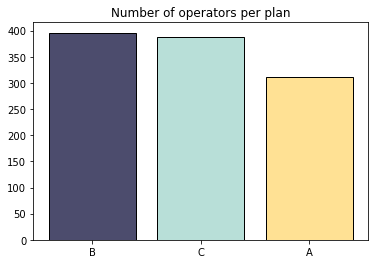

In [48]:
plt.bar(top_plan.index, top_plan.operator_id, color = ['#4C4C6D','#B8DFD8','#FFE194'], edgecolor = 'black')
plt.title('Number of operators per plan')
plt.show()

> - Plan B seems to be the plan that utilises most of the operators 

### IDENTIFYING INEFFECTIVE OPERATORS

In [49]:
missed = operator[operator.is_missed_call == True].groupby('operator_id').is_missed_call.count().sort_values(ascending=False).to_frame()
missed.head()

,is_missed_call
operator_id,
885876,135
891410,131
893804,130
901880,128
891414,126


In [50]:
incoming = operator[operator.direction =='in'].groupby('operator_id').direction.count().sort_values(ascending=False).to_frame()
incoming.head()

,direction
operator_id,
901880,121
908960,116
893804,116
885890,103
885876,103


In [51]:
outgoing = operator[operator.direction =='out'].groupby('operator_id').direction.count().sort_values(ascending=False).to_frame()
outgoing.head()

,direction
operator_id,
901884,246
885876,216
901880,216
887276,215
891414,212


In [52]:
waiting = operator.groupby('operator_id').wait_time.sum().sort_values(ascending = False).to_frame()
waiting.head()

,wait_time
operator_id,
885890,1586416
885876,1536381
925922,466688
929428,372774
929426,225526


In [53]:
# taking 80% quantiles from each distribution

missed_quant = round(missed.is_missed_call.quantile(0.9))
incoming_quant = round(incoming.direction.quantile(0.9))
outgoing_quant = round(outgoing.direction.quantile(0.1))
waiting_quant = round(waiting.wait_time.quantile(0.9))

In [54]:
# finding the list of operators in each case

a = missed[missed.is_missed_call > missed_quant].index.to_list()
b = incoming[incoming.direction > incoming_quant].index.to_list()
c = outgoing[outgoing.direction < outgoing_quant].index.to_list()
d = waiting[waiting.wait_time > waiting_quant].index.to_list()

#op_list = set(a + op2 + op3 + op4)

In [55]:
#ineffective = list(set(((set(a).intersection(set(b))).intersection(set(d)))))#.union(set(c))))

ineffective = list(set((set(set(a).intersection(set(b))).intersection(set(d))).union(set(c))))
print(ineffective)

[930816, 970240, 941826, 905480, 914440, 899082, 970250, 891918, 913938, 891410, 970258, 935956, 913942, 930326, 879898, 928284, 966686, 895266, 937770, 937772, 882478, 969262, 908080, 937778, 891192, 905538, 940610, 969284, 969288, 891976, 883018, 914256, 937720, 962904, 905308, 906076, 902238, 900192, 914272, 915556, 893804, 891250, 885876, 944246, 890234, 945274, 919418, 905470, 885890, 931458, 930692, 963716, 923526, 905862, 956292, 947596, 909452, 938896, 929424, 937872, 932246, 904344, 946072, 924572, 960674, 945058, 906406, 919206, 949420, 954284, 919214, 944560, 899250, 939698, 945074, 883898, 955068, 914626, 948170, 918988, 955086, 954318, 941816, 921818, 907998, 937956, 921318, 954086, 945898, 937710, 937716, 901880, 958458, 901884, 882686]


> - The number of missed, incoming , outgoing calls and wait time for each operator is calculated
> - For missed , incoming and wait time, a cut off of 90% quantile range is taken and for outgoing call 10% quantile range is taken as the cut off
> - The operators that lie above 90% range in missed, incoming and wait time and below 10% of outgoing are considered to be ineffevtive operators.
> - Since missed call, waiting time are related to incoming call, intersection of these set along with the union of operators in the outgoing call list is taken and considered to be the list of ineffective operators 

In [56]:
eff_op = operator[~operator.operator_id.isin(ineffective)]

In [57]:
ineff_op = operator[operator.operator_id.isin(ineffective)]

In [58]:
# Find the most valuable clients and most used operators 

eff_op.groupby(['user_id','operator_id']).calls_count.sum().sort_values(ascending = False)[:10].to_frame()

calls_count
user_id operator_id             
167827  929428             24572
166582  925922             22210
167285  908640             16699
167827  929426             12041
168361  945286              7919
        945302              7059
168253  952948              5423
167112  904016              5175
167626  919364              5096
168361  945322              5015

> - Now that we have found the ineffective operators and effective operators, we can exclude the ineffective ones to find the effective ones and the clients who use those are considered to be valuable 

### Hypothesis testing 

> - Ho : Daily call duration for effective operator is same as ineffective operators
> - H1 : Daily call duration for effective operator is not the same as ineffective operators 

In [59]:
#taking samples from eff_op

eff_sample = eff_op.sample(ineff_op.shape[0], random_state = 0)
eff_call = eff_sample.groupby('date').call_duration.sum()


ineff_call = ineff_op.groupby('date').call_duration.sum()

In [60]:
from scipy.stats import mannwhitneyu
data1 = eff_call
data2 = ineff_call
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.10f' % (stat, p))
if p < 0.05:
    print('Reject H0')
else:
    print('Failed to reject H0')

stat=2574.000, p=0.0000000000
Reject H0


> - Mannwhitneyu test was selected to find if the distribution in both the sample is equal or not 
> - Alpha value of 0.05 was chosen as its the most common values 
> - Based on the test, the null hypothesis has been rejected which means that the daily call duration for effective operators is not the same as that or ineffective operators


### Conclusion

- Missing values in the operator_id column was inferred from user_id columns and filled, missing vales in internal column was filled using mode in the operators dataset. The clients data had no missing values
- All the date columns in both the dataset were changed form object to date time and operator_id was changed from float to int 
- Wait time column was added by subtracting total_call_duration with call_duration. A few other columns such as month, day and week columns were extracted in both the datasets
- There were more number of clients registered in the month of August and the least registrations were in September
- The operators were used increasingly on the weekdays with a drastic fall during the weekend
- The number of outgoing calls are more compared to incoming, the number of external calls are more compared  to internal
- The number of missed calls is only nearly 13% less than the number of received calls 
- The top 10 clients and the operators were found, but the operators also included the missed calls. This was later filtered after finding and excluding the ineffective operators
- The average number of calls is nearly 30% more for Plan A compared to plan B and C. This shows that clients preferred Plan A
- A few operators with the maximum and minimum wait_time was found
- The scatter plot of call duration vs calls count revealed that Plan A has more number of missed calls compared to any other plan. 
- Top 10 clients who uses more number of operators were found 
- The number of missed, incoming, outgoing and internal/external calls are calculated and shown in the cross tab
- Majority of the operators are being used in Plan B
- The number of missed, incoming and outgoing call along with wait_time for each operator is calculated. Ineffective operator is taken as the union of operators in the incoming call operators and outgoing call operators
- Finally, once the ineffective operators are found and removed, the most useful operator and the most valuable clients are found
- Hypothesis testing was performed to check if the daily call duration for both effective and ineffective operators are same. It was statistically proven that the call duration was not the same 


Recommendaions :
- All the ineffective operators can be removed. 
- These operators can be betetr distributed among future clients









#### Tableau dashborad Link : https://public.tableau.com/app/profile/poornima.venkatesha3162/viz/Telecom_operator/Dashboard1

#### Presentation Link : https://drive.google.com/file/d/1CBmaNCroCCxW5PoDBjKwR_fpaR0D7dld/view?usp=sharing